In [52]:
import pystan
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Module for plotting Stan output
import sys
import arviz as az

In [11]:
normalconj = """
data {
    int<lower=0> N; // number of observations
    real y[N]; // observations
}
parameters {
    real mu;
}
model {
    mu ~ normal(0, 10); // prior on mean, 10 is the *sd*
    y ~ normal(mu, 1); // likelihood
}
"""
sm = pystan.StanModel(model_code=normalconj)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c2c6db8fbfd7f5ebb758fa012881d1b6 NOW.
C:\Users\Malik\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Malik\AppData\Local\Temp\tmp_b19wu7_\stanfit4anon_model_c2c6db8fbfd7f5ebb758fa012881d1b6_3325501099102447372.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [43]:
normal_dat = {'N': 5,
               'y': [6.4,6.1,5.0,5.8,5.88]}

In [13]:
fit = sm.sampling(data=normal_dat, iter=1000, chains=4)

In [14]:
print(fit)

Inference for Stan model: anon_model_c2c6db8fbfd7f5ebb758fa012881d1b6.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     5.84    0.02   0.44   4.97   5.54   5.84   6.14   6.67    666    1.0
lp__  -1.19    0.02   0.66  -3.07  -1.34  -0.94  -0.76  -0.72    784    1.0

Samples were drawn using NUTS at Wed Jul  3 20:19:40 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [15]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

In [16]:
np.mean(mu)

5.835458697633603

In [17]:
## posterior mean (for each chain)
## second row is mean lp__ (log posterior)
fit.get_posterior_mean()

array([[ 5.79576273,  5.88632789,  5.80345104,  5.85629313],
       [-1.1613434 , -1.21496531, -1.20940671, -1.17235625]])

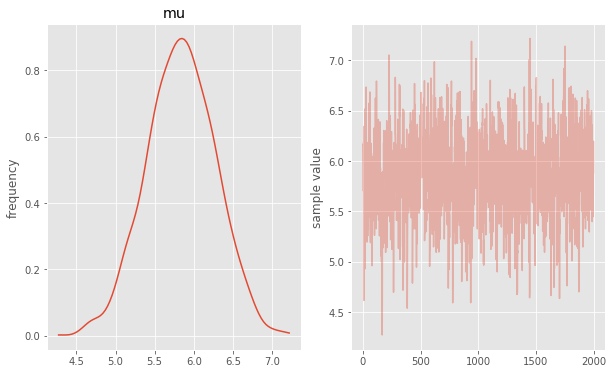

In [20]:
fit.plot();

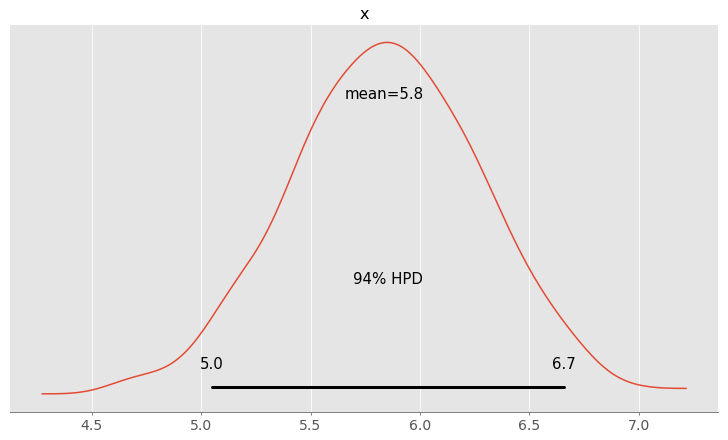

In [21]:
az.plot_posterior(mu);

In [44]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}



In [45]:
sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.
C:\Users\Malik\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Malik\AppData\Local\Temp\tmp8pns_z5_\stanfit4anon_model_19a09b474d1901f191444eaf8a6b8ce2_7215493152414155147.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


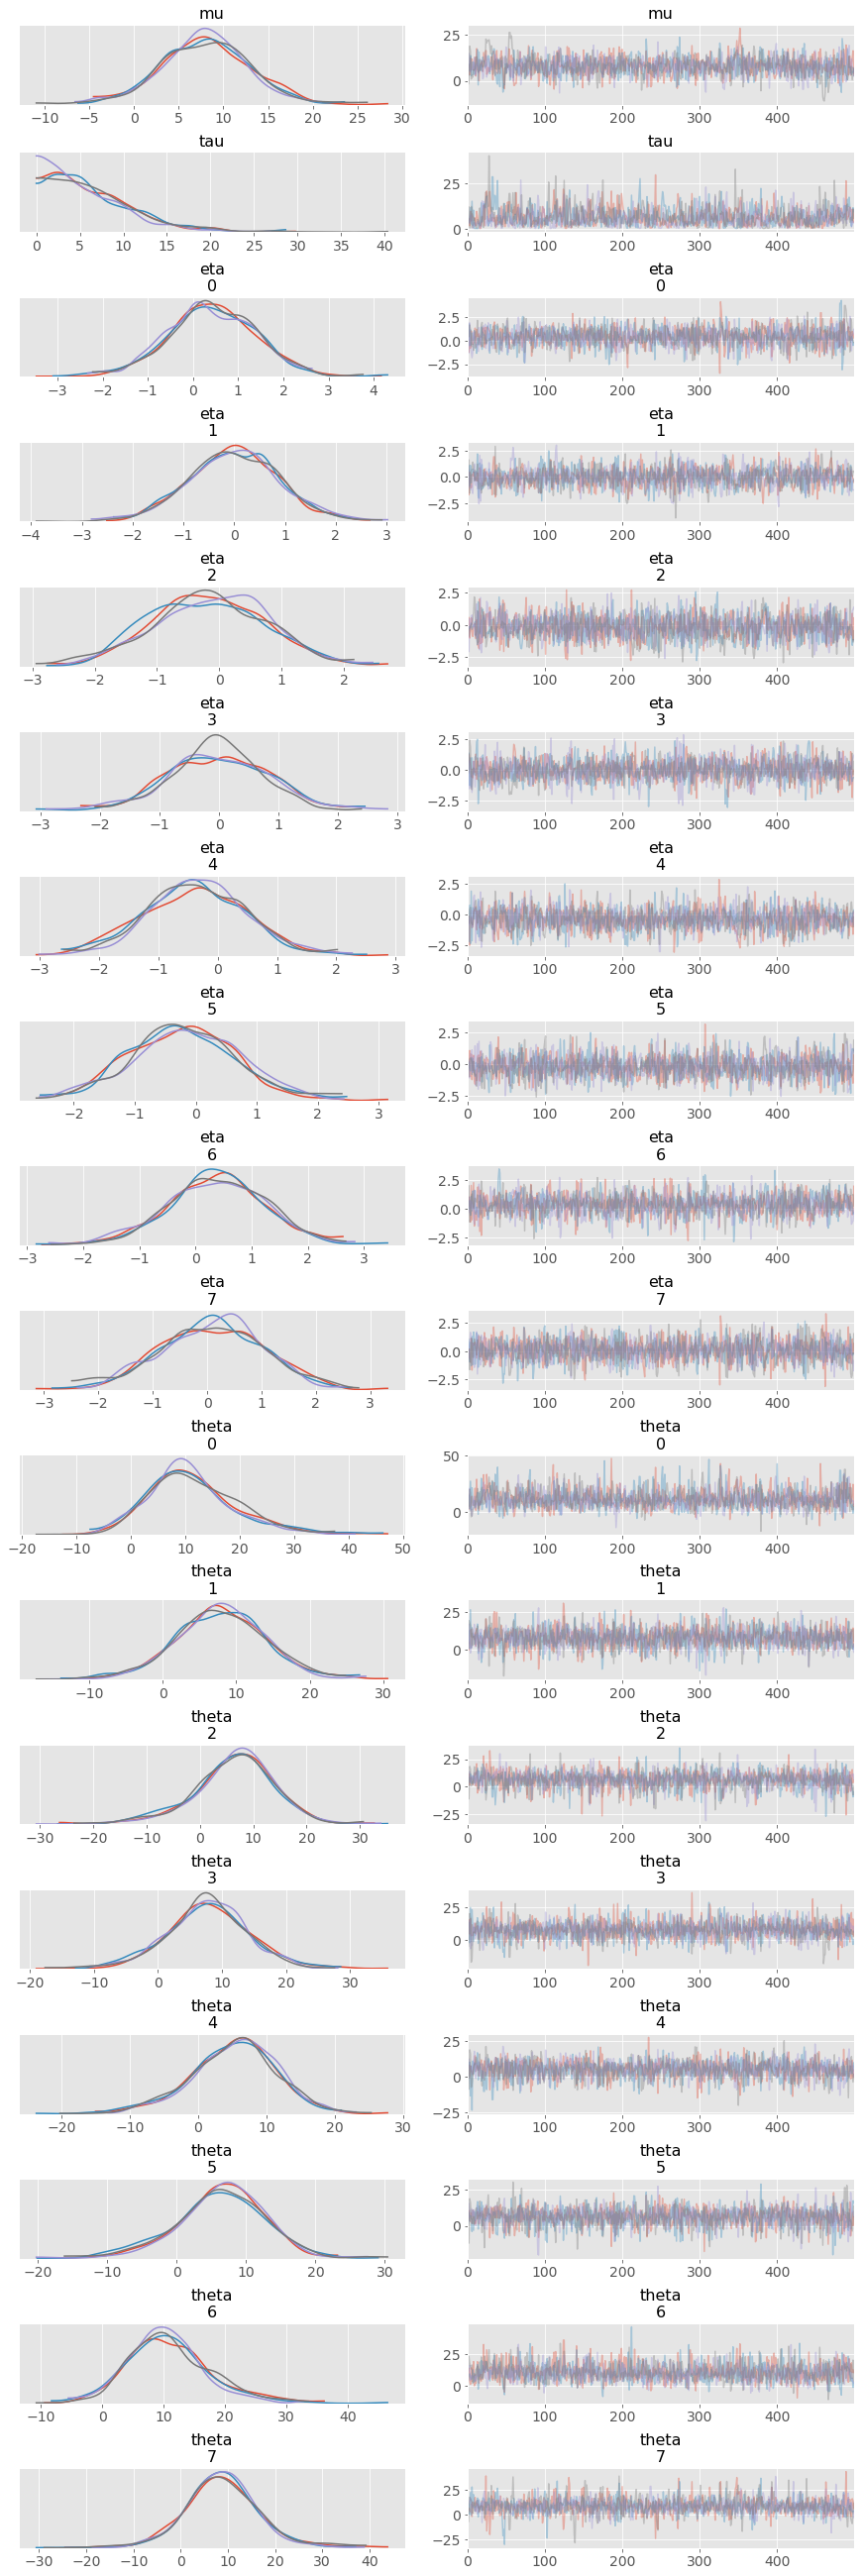

In [47]:
az.plot_trace(fit);

In [48]:
print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          7.9    0.15   4.96  -2.29   4.56   7.95  11.07  17.61   1167    1.0
tau        6.32    0.18   5.01   0.24   2.43   5.25   9.05  19.08    748   1.01
eta[1]     0.41    0.02   0.97  -1.52   -0.2    0.4   1.07    2.3   2169    1.0
eta[2]  -6.3e-3    0.02   0.89  -1.72  -0.57  -0.01   0.58   1.78   1854    1.0
eta[3]    -0.17    0.02   0.92  -1.91   -0.8  -0.17   0.47   1.62   2002    1.0
eta[4]    -0.02    0.02   0.86  -1.78  -0.58  -0.03   0.55   1.71   2164    1.0
eta[5]    -0.38    0.02   0.86   -2.1  -0.95  -0.38   0.21   1.38   1745    1.0
eta[6]     -0.2    0.02   0.88   -1.9  -0.79  -0.22   0.39   1.61   2137    1.0
eta[7]     0.36    0.02   0.89   -1.5  -0.19   0.37   0.94   2.07   2039    1.0
eta[8]     0.

In [79]:
sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6cf12a7a742c39885734a963507af2f9 NOW.
C:\Users\Malik\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Malik\AppData\Local\Temp\tmpp04aulf4\stanfit4anon_model_6cf12a7a742c39885734a963507af2f9_7313195249957759590.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [49]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

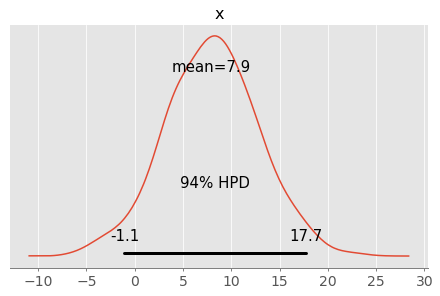

In [51]:
az.plot_posterior(mu);